Symbols:  
tau is the temperature in energy units: $\tau = k_B T$  
gap is the gap energy in what?  

In [1]:
%matplotlib inline
save_directory = '../../../thesis/kid/'
save = False

In [2]:
from scipy.constants import k as k_B, pi
from scipy.special import k0, k1
from scipy.integrate import quad

In [3]:
def integrand(E, gap, tau):
    return tau**-1 * np.sqrt(E**2 - 1) * np.exp(E / tau) * (np.exp(E / tau) + 1 )**-2

def approximate1(gap, tau):
    return ((pi * tau) / (2 * gap))**(1/2) * np.exp(-gap / tau)

def approximate2(gap, tau):
    return k1(gap / tau)

def numerical(gap, tau, epsabs=1e-13, epsrel=1e-13, limit=100000):
    return quad(integrand, gap, 20 * tau + 10, args=(gap, tau), points=(gap,),
                epsabs=epsabs, epsrel=epsrel, limit=limit)

def numerical_original(gap, tau, epsabs=1e-14, epsrel=1e-14, limit=10000):
    def i(E, gap, tau):
        return E / np.sqrt(E**2 - 1) * (np.exp(E / tau) + 1 )**-1
    return quad(i, gap, 20 * tau + 10, args=(gap, tau), points=(gap,),
                epsabs=epsabs, epsrel=epsrel, limit=limit)


In [4]:
EE = np.linspace(1, 10, 10000)

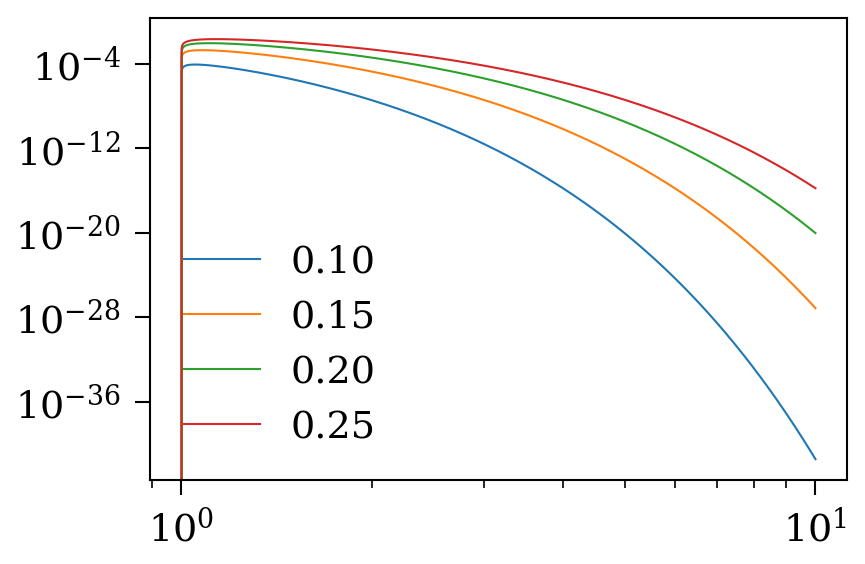

In [5]:
gap = 1
taus = [0.1, 0.15, 0.2, 0.25]

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
for tau in taus:
    ax.plot(EE, integrand(EE, gap, tau), label='{:.2f}'.format(tau))

ax.legend()

In [6]:
TT = np.linspace(0.02, 0.5, 1000)

In [7]:
II = np.array([numerical(gap, T)[0] for T in TT])
# This fails
#OO = np.array([numerical_original(gap, T)[0] for T in TT])

(-1e-07, 1e-07)

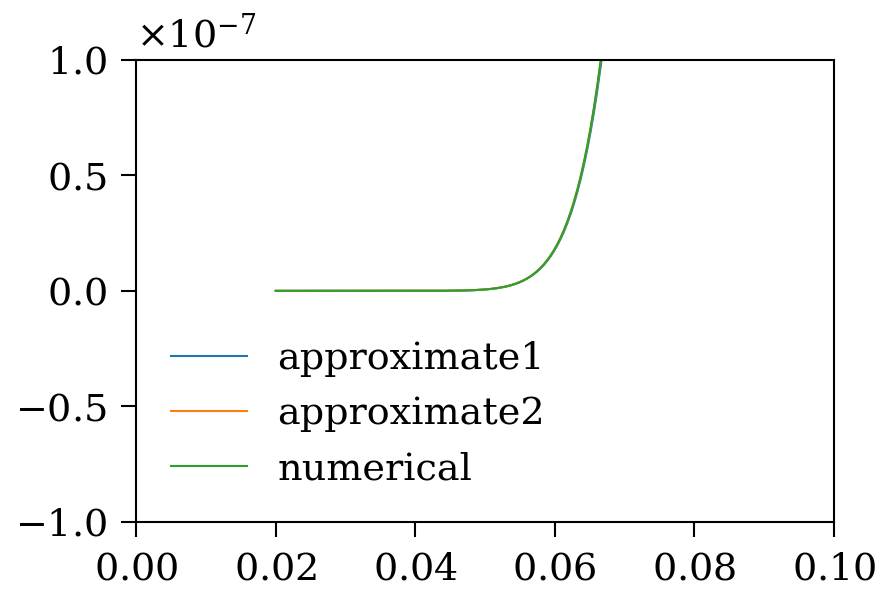

In [8]:
fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(TT, approximate1(gap, TT), label='approximate1')
ax.plot(TT, approximate2(gap, TT), label='approximate2')
ax.plot(TT, II, label='numerical')
ax.legend(loc='best')
ax.set_xlim(0, 0.1)
ax.set_ylim(-0.0000001, 0.0000001)

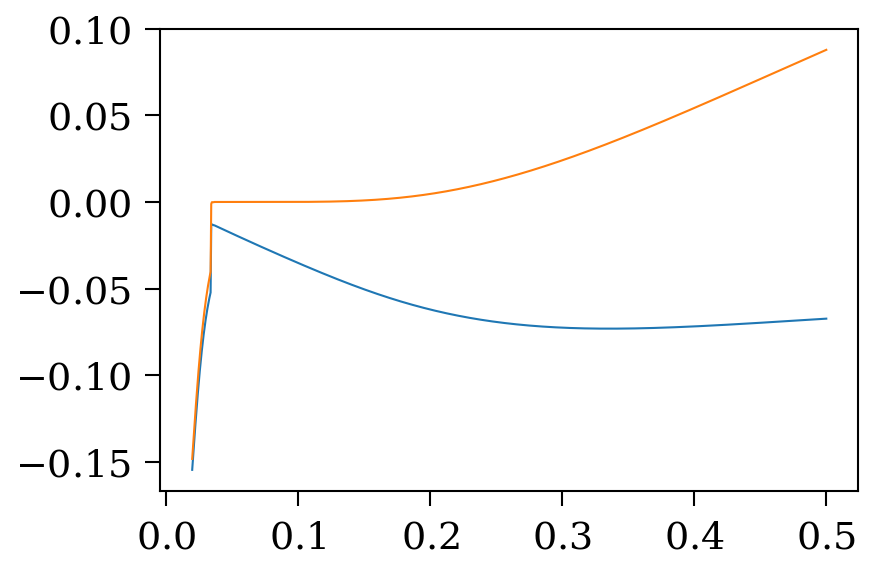

In [9]:
fig, ax = plt.subplots()
ax.plot(TT, (approximate1(gap, TT) / II) - 1)
ax.plot(TT, (approximate2(gap, TT) / II) - 1)
